# Library Import

In [1546]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To set figure size
from matplotlib.pyplot import figure

# 1 - Business Understanding
### Scenario:
Luis Xaviar the team analyst of the football team of Eibar FC recently was asked by the manager to review the performance of their last match
the manager wanted to know how he could improve his style of play in three areas of the game, passing, shooting and defending.
this would help improve not only his teams performance but other teams might find it useful as well to improve their own performance.
Using this football data Luis focused on these areas and came up with the following problems

## 1.Passing:
### You would look at this data to try and improve the build up of play and the potential of successful counter attacking:  
1.Analyzing the correlation between distance of a pass with the success rate.

2.Investigating is there any correlation between total amount of passes to shots taken 

3.Investigating the likelihood of a pass being inaccurate in the first half compared to the second half  

## 2.Defense
### You would look at this data to try and strengthen defense to reduce amount of goals scored:
4.Analyzing the outcomes of tackles.

5.Investigating which team is more likely to fail a tackle in the first half compared to the second half

## 3.Attacking
### Look at this data to try and maximize your goal scoring efficiency and increase the likelihood of scoring a goal:
6.Analyzing the influence of a player shooting from a first touch on the probability of it leading to a goal.

7.Investigating the volume of shots attempted between the first and second half.

8.Analyzing how accurate players are with their heads to hit a shot on target.

9.Analyzing the probability of a player trying to take a regular shot on goal near the end of the first and second halves(+/- 5 minutes before the half ends)

## Numerical Predictions
1. Pass Success prediction- Are we able to predict the success probability of a pass using time of the match and the distance of the pass


# 2 - Data Mining:


## Library Imports

In [1547]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To set figure size
from matplotlib.pyplot import figure

## Data Import

In [1548]:
import pandas as pd
data= pd.read_csv("outputDataMining.csv")

# 3 - Data Cleaning:

In [1549]:
# Drop the columns that are not needed

data.drop(['bad_behaviour_card'], axis=1, inplace=True)
data.drop(['ball_receipt_outcome'], axis=1, inplace=True)
data.drop(['ball_recovery_recovery_failure'], axis=1, inplace=True)
data.drop(['carry_end_location'], axis=1, inplace=True)
data.drop(['clearance_body_part'], axis=1, inplace=True)
data.drop(['clearance_head'], axis=1, inplace=True)
data.drop(['clearance_left_foot'], axis=1, inplace=True)
data.drop(['clearance_right_foot'], axis=1, inplace=True)
data.drop(['counterpress'], axis=1, inplace=True)
data.drop(['dribble_no_touch'], axis=1, inplace=True)
data.drop(['foul_committed_advantage'], axis=1, inplace=True)
data.drop(['foul_committed_card'], axis=1, inplace=True)
data.drop(['foul_committed_type'], axis=1, inplace=True)
data.drop(['foul_won_advantage'], axis=1, inplace=True)
data.drop(['goalkeeper_body_part'], axis=1, inplace=True)
data.drop(['goalkeeper_end_location'], axis=1, inplace=True)
data.drop(['location'], axis=1, inplace=True)
data.drop(['match_id'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['index'], axis=1, inplace=True)
data.drop(['miscontrol_aerial_won'], axis=1, inplace=True)
data.drop(['off_camera'], axis=1, inplace=True)
data.drop(['out'], axis=1, inplace=True)
data.drop(['pass_angle'], axis=1, inplace=True)
data.drop(['pass_assisted_shot_id'], axis=1, inplace=True)
data.drop(['pass_end_location'], axis=1, inplace=True)
data.drop(['pass_cut_back'], axis=1, inplace=True)
data.drop(['pass_goal_assist'], axis=1, inplace=True)
data.drop(['possession_team_id'], axis=1, inplace=True)
data.drop(['pass_inswinging'], axis=1, inplace=True)
data.drop(['pass_miscommunication'], axis=1, inplace=True)
data.drop(['pass_shot_assist'], axis=1, inplace=True)
data.drop(['pass_no_touch'], axis=1, inplace=True)
data.drop(['pass_outswinging'], axis=1, inplace=True)
data.drop(['pass_recipient'], axis=1, inplace=True)
data.drop(['player_id'], axis=1, inplace=True)
data.drop(['pass_straight'], axis=1, inplace=True)
data.drop(['pass_switch'], axis=1, inplace=True)
data.drop(['pass_through_ball'], axis=1, inplace=True)
data.drop(['player'], axis=1, inplace=True)
data.drop(['related_events'], axis=1, inplace=True)
data.drop(['shot_aerial_won'], axis=1, inplace=True)
data.drop(['shot_end_location'], axis=1, inplace=True)
data.drop(['shot_freeze_frame'], axis=1, inplace=True)
data.drop(['shot_key_pass_id'], axis=1, inplace=True)
data.drop(['shot_statsbomb_xg'], axis=1, inplace=True)
data.drop(['shot_type'], axis=1, inplace=True)
data.drop(['substitution_outcome'], axis=1, inplace=True)
data.drop(['substitution_replacement'], axis=1, inplace=True)
data.drop(['tactics'], axis=1, inplace=True)
data.drop(['timestamp'], axis=1, inplace=True)
data.drop(['team_id'], axis=1, inplace=True)
data.drop(['type'], axis=1, inplace=True)
data.drop(['under_pressure'], axis=1, inplace=True)
data.drop(['block_deflection'], axis=1, inplace=True)
data.drop(['clearance_aerial_won'], axis=1, inplace=True)
data.drop(['dribble_nutmeg'], axis=1, inplace=True)
data.drop(['dribble_outcome'], axis=1, inplace=True)
data.drop(['foul_won_defensive'], axis=1, inplace=True)
data.drop(['goalkeeper_position'], axis=1, inplace=True)
data.drop(['interception_outcome'], axis=1, inplace=True)
data.drop(['pass_aerial_won'], axis=1, inplace=True)
data.drop(['pass_cross'], axis=1, inplace=True)
data.drop(['pass_deflected'], axis=1, inplace=True)
data.drop(['pass_height'], axis=1, inplace=True)
data.drop(['pass_type'], axis=1, inplace=True)
#data.drop(['second'], axis=1, inplace=True)
#data.drop(['minute'], axis=1, inplace=True)
data.drop(['duration'], axis=1, inplace=True)
data.drop(['goalkeeper_outcome'], axis=1, inplace=True)
data.drop(['goalkeeper_technique'], axis=1, inplace=True)
data.drop(['goalkeeper_type'], axis=1, inplace=True)
data.drop(['pass_body_part'], axis=1, inplace=True)
data.drop(['play_pattern'], axis=1, inplace=True)
data.drop(['position'], axis=1, inplace=True)
data.drop(['possession_team'], axis=1, inplace=True)
#data.drop(['shot_body_part'], axis=1, inplace=True)
data.drop(['shot_deflected'], axis=1, inplace=True)
data.drop(['possession'], axis=1, inplace=True)
data.drop(['pass_technique'], axis=1, inplace=True)

## Missing Values

In [1550]:
# Drop the rows where all elements are missing.
columns_to_check =['duel_outcome','duel_type','pass_length','pass_outcome','shot_first_time','shot_outcome','shot_technique','second','minute','shot_body_part']
data.dropna(subset=columns_to_check, how='all', inplace=True)

# if pass length is not null and pass outcome is null, then pass outcome is complete
data.loc[data['pass_length'].notnull() & data['pass_outcome'].isnull(),'pass_outcome'] = 'Complete'

# if duel type is not null and duel outcome is null, then duel outcome is lost
data.loc[data['duel_type'].notnull() & data['duel_outcome'].isnull(),'duel_outcome'] = 'Lost'

# if shot outcome is not null and shot first time is null, then shot first time is false
data.loc[data['shot_outcome'].notnull() & data['shot_first_time'].isnull(),'shot_first_time'] = 'False'

# Fill the missing values with the value N/A
data.fillna("N/A", inplace = True)

# Convert the pass length to float and round to 1 decimal place
#Ran into problem with converting pass_length to N/A had to convert to numeric first and then fill the missing values with 0 instead of N/A
data['pass_length'] = pd.to_numeric(data['pass_length'], errors='coerce').fillna(0).round(1)
data['pass_length'] = data ['pass_length']


# Convert the shot first time to float
data['shot_first_time'] = data['shot_first_time'].astype(str)

# Checking the missing values in the dataset.
print(data.isnull().sum())

print(data)
#data.to_csv('data.csv', index=False)  # save as csv file

duel_outcome       0
duel_type          0
minute             0
pass_length        0
pass_outcome       0
period             0
second             0
shot_body_part     0
shot_first_time    0
shot_outcome       0
shot_technique     0
team               0
dtype: int64
     duel_outcome duel_type  minute  pass_length pass_outcome  period  second  \
0             N/A       N/A       0          0.0          N/A       1       0   
1             N/A       N/A       0          0.0          N/A       1       0   
2             N/A       N/A       0          0.0          N/A       1       0   
3             N/A       N/A       0          0.0          N/A       1       0   
4             N/A       N/A      45          0.0          N/A       2       0   
...           ...       ...     ...          ...          ...     ...     ...   
2609          N/A       N/A      45          0.0          N/A       2      49   
2610          N/A       N/A      72          0.0          N/A       2      42   
2611  

C:\Users\wwwno\AppData\Local\Temp\ipykernel_12368\2884799054.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("N/A", inplace = True)


## Outliers

# 4 - Data Exploration:

## Univaraite Analysis

### Categorical 

In [1551]:
# Univariate for categorical variables such as duel outcome, duel type, pass outcome, shot body part, shot first time, shot outcome, shot technique, team
print(data.duel_outcome.unique())
print(data.duel_type.unique())
print(data.pass_outcome.unique())
print(data.shot_body_part.unique())
print(data.shot_first_time.unique())
print(data.shot_outcome.unique())
print(data.shot_technique.unique())
print(data.team.unique())

['N/A' 'Lost' 'Success In Play' 'Lost Out' 'Won' 'Lost In Play']
['N/A' 'Aerial Lost' 'Tackle']
['N/A' 'Complete' 'Out' 'Incomplete' 'Unknown' 'Pass Offside'
 'Injury Clearance']
['N/A' 'Head' 'Right Foot' 'Left Foot']
['N/A' 'False' 'True']
['N/A' 'Off T' 'Saved' 'Blocked' 'Goal' 'Post' 'Wayward']
['N/A' 'Normal' 'Half Volley' 'Volley']
['Levante UD' 'Eibar']


#### Duel Outcome

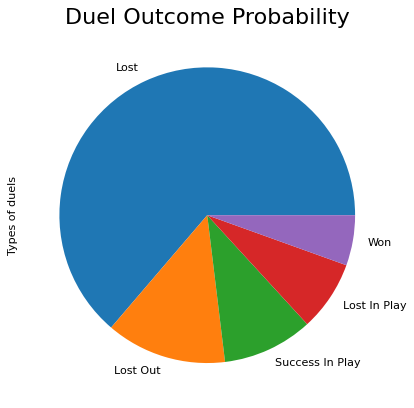

Around 62% of duels are lost while approximately 10% are won in play and 5% are only won


In [1552]:
#________________________________________Duel Outcome_______________________________________________________

#Filtering the N/A out for dueling outcome
filtered_DuelOutcome = data[data['duel_outcome'] != 'N/A']

#Using a pie chart to explore duel outcome data
#First calculate the percentage of each Duel outcome .
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
filtered_DuelOutcome2 = filtered_DuelOutcome['duel_outcome'].value_counts(normalize=True)
filtered_DuelOutcome2.plot.pie()
plt.title("Duel Outcome Probability", size=20)
plt.ylabel("Types of duels")
plt.show()
print("Around 62% of duels are lost while approximately 10% are won in play and 5% are only won") 



#### Duel Type

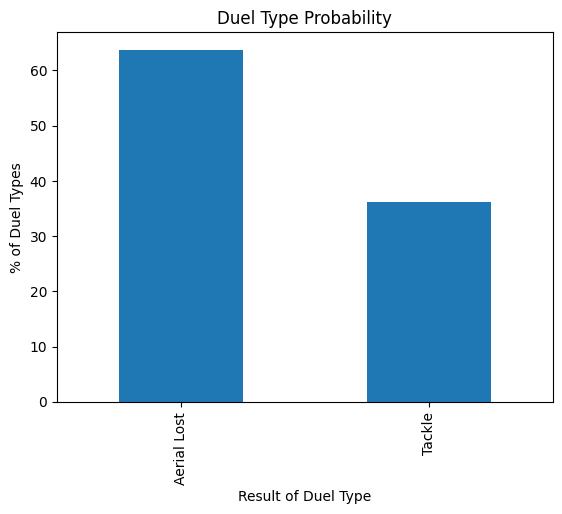

Approximately 2/3 of duels are aerial duels and the other 1/3 are ground duels


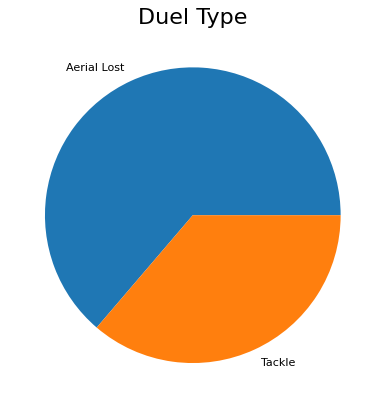

There is a around a 66% chance of duel being an aerial 


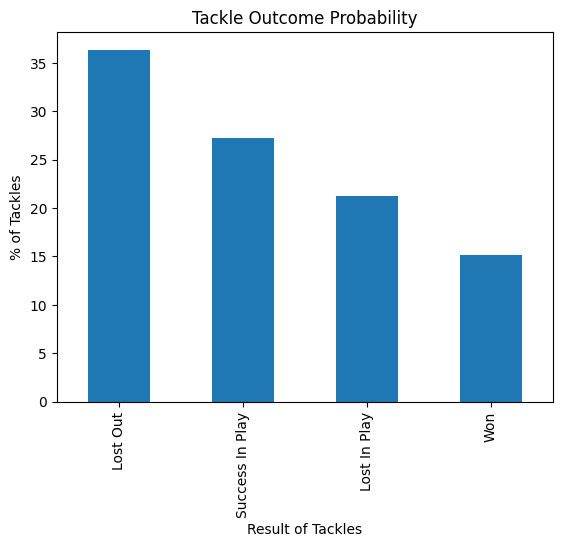

Tackles have approximately a 40% success rate and a 60% failure rate


In [1553]:
#________________________________________Duel Type_______________________________________________________

#Filtering the N/A out for dueling type
filtered_DuelType = data[data['duel_type'] != 'N/A']
# Let's calculate the percentage of each duel type probability.
duelType_percentage = filtered_DuelType['duel_type'].value_counts(normalize=True)*100
duelType_percentage.plot.bar()
plt.title("Duel Type Probability")
plt.xlabel("Result of Duel Type")
plt.ylabel("% of Duel Types")
plt.show() #Show the plot
print("Approximately 2/3 of duels are aerial duels and the other 1/3 are ground duels") 

#OR maybe use a pie chart to explore the education data 
#First calculate the percentage of each education category.
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
filtered_DuelType1 = filtered_DuelType['duel_type'].value_counts(normalize=True)
filtered_DuelType1.plot.pie()
plt.title("Duel Type", size=20)
plt.ylabel("")
plt.show()
print("There is a around a 66% chance of duel being an aerial ") 

#Filtering the N/A out for dueling outcome and have to be a tackle
filtered_DuelOutcome = data[(data['duel_outcome'] != 'N/A') & (data['duel_type'] == 'Tackle')]
# Calculate the percentage of each duel outcome probability.
duel_percentage = filtered_DuelOutcome['duel_outcome'].value_counts(normalize=True)*100
duel_percentage.plot.bar()
plt.title("Tackle Outcome Probability")
plt.xlabel("Result of Tackles")
plt.ylabel("% of Tackles")
plt.show() #Show the plot
print("Tackles have approximately a 40% success rate and a 60% failure rate") 




#### Pass outcome

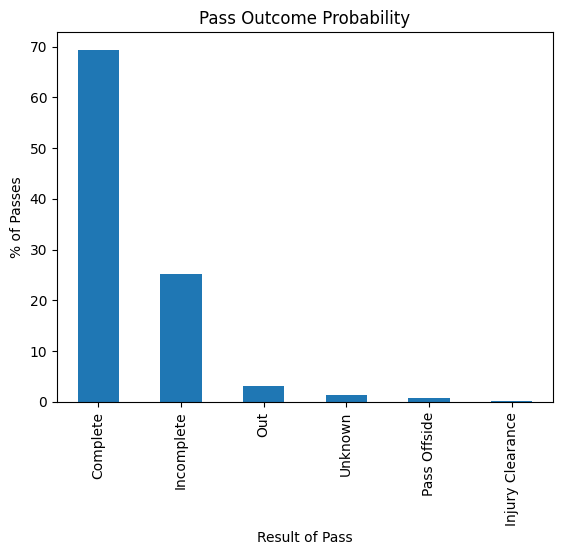

Nearly 70% of attempted passes are completed while the other 30% make up for unsuccessful passes and passes that are intercepted


In [1554]:
#________________________________________Pass Outcome_______________________________________________________

#Filtering the N/A out for pass outcome
filtered_PassOutcome = data[data['pass_outcome'] != 'N/A']

# Calculate the percentage of each pass outcome probability.
passOutcome_percentage = filtered_PassOutcome['pass_outcome'].value_counts(normalize=True)*100
passOutcome_percentage.plot.bar()
plt.title("Pass Outcome Probability")
plt.xlabel("Result of Pass")
plt.ylabel("% of Passes")
plt.show() #Show the plot
print("Nearly 70% of attempted passes are completed while the other 30% make up for unsuccessful passes and passes that are intercepted") 



#### Shot body part

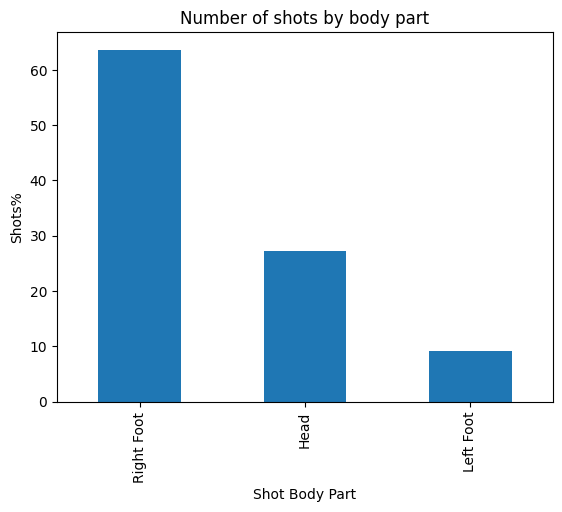

Just over 60% of shots are taken with their right foot , just over 25% are headers and the rest are taken with their left foot


In [1555]:
#________________________________________Shot body part_______________________________________________________

#Filtering the N/A out for shot body part
filtered_Shot_Body_Part = data[data['shot_body_part'] != 'N/A']

# Calculate the percentage of each shot body part
shot_Body_Part_Percentage = filtered_Shot_Body_Part['shot_body_part'].value_counts(normalize=True)*100
shot_Body_Part_Percentage.plot.bar()
plt.title("Number of shots by body part")
plt.xlabel("Shot Body Part")
plt.ylabel("Shots%")
plt.show() #Show the plot
print("Just over 60% of shots are taken with their right foot , just over 25% are headers and the rest are taken with their left foot") 


#### Shot first time

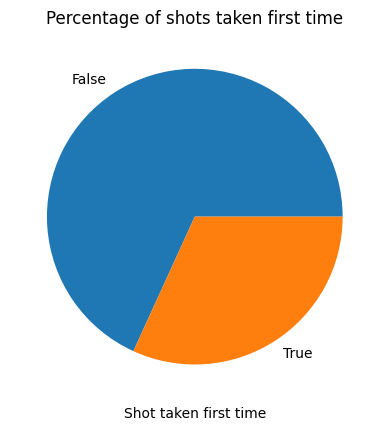

Approximately a little more than 30% of shots taken are done so first time


In [1556]:
#________________________________________Shot first time_______________________________________________________

#Filtering the N/A out for shooting first time outcome
filtered_Shot_firstime = data[data['shot_first_time'] != 'N/A']

# Calculate the total of shots being taken first time.
shot_firstTime_Percentage = filtered_Shot_firstime['shot_first_time'].value_counts(normalize=True)*100
shot_firstTime_Percentage.plot.pie()
plt.title("Percentage of shots taken first time")
plt.xlabel("Shot taken first time")
plt.ylabel("")
plt.show() #Show the plot
print("Approximately a little more than 30% of shots taken are done so first time") 

#### Shot outcome


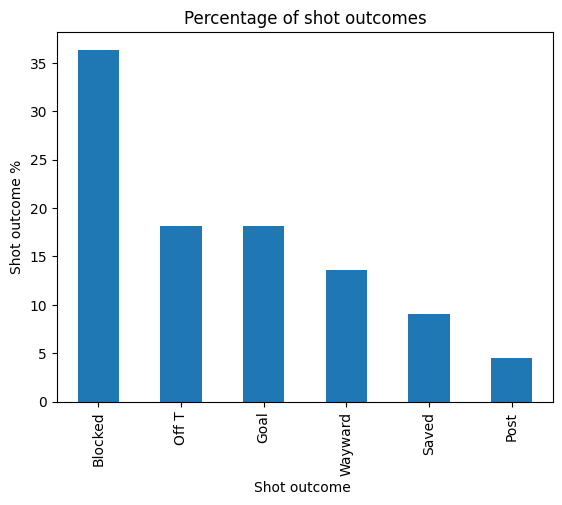

From all shots taken approximately 35% are on target, 30% are off target and 35% are blocked


In [1557]:
#________________________________________Shot outcome_______________________________________________________

#Filtering the N/A out for Shot outcome  outcome
filtered_Shot_outcome = data[data['shot_outcome'] != 'N/A']

# Calculate the percentage of each shot outcome by type
shot_outcome_Percentage = filtered_Shot_outcome['shot_outcome'].value_counts(normalize=True)*100
shot_outcome_Percentage.plot.bar()
plt.title("Percentage of shot outcomes")
plt.xlabel("Shot outcome ")
plt.ylabel("Shot outcome %")
plt.show() #Show the plot
print("From all shots taken approximately 35% are on target, 30% are off target and 35% are blocked") 

#### Shot technique

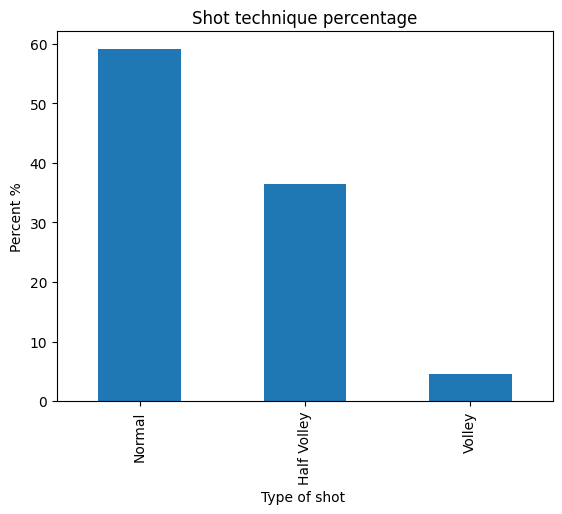

Regular shots made up for just under 60% of all shots taken in the game while different types of volleys made up the other 40%


In [1558]:
#________________________________________Shot technique_______________________________________________________

#Filtering the N/A out for Shot technique
filtered_Shot_technique = data[data['shot_technique'] != 'N/A']

# Calculate the percentage of each shot technique by type
shot_technique_Percentage = filtered_Shot_technique['shot_technique'].value_counts(normalize=True)*100
shot_technique_Percentage.plot.bar()
plt.title("Shot technique percentage")
plt.xlabel("Type of shot ")
plt.ylabel("Percent %")
plt.show() #Show the plot
print("Regular shots made up for just under 60% of all shots taken in the game while different types of volleys made up the other 40%") 

#### Team

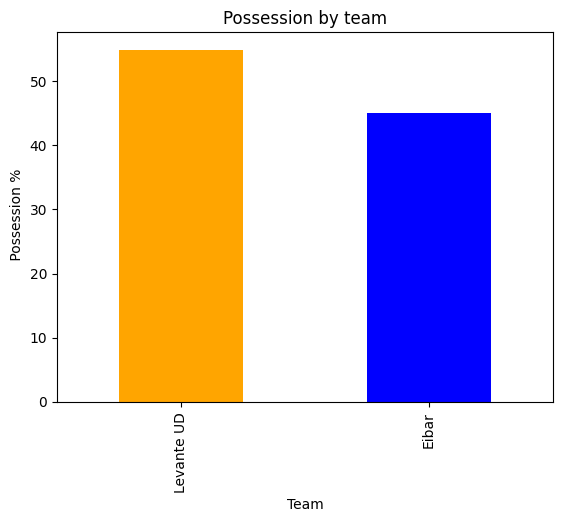

Levante had approximately 55% of the possession during the game while Eibar had 45%


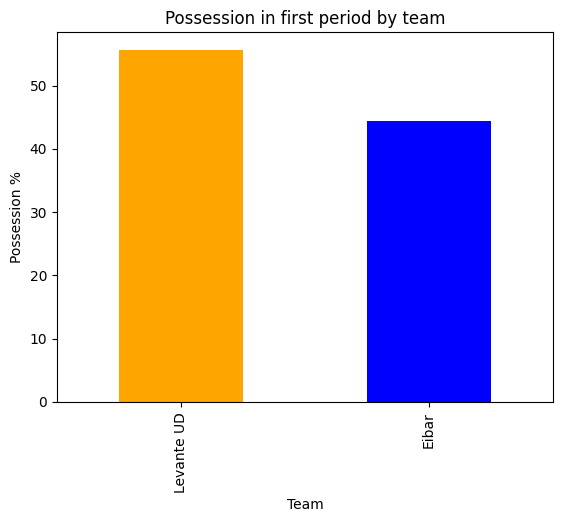

Levante had approximately 55% of the possession thought the game while Eibar had 45% in the first period


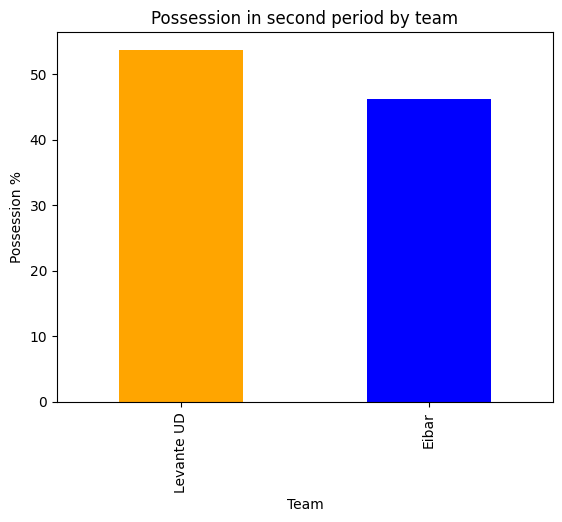

Levante had almost 60% of the possession thought the game while Eibar had 40% in the second period


In [1559]:
#________________________________________Shot technique_______________________________________________________

# Calculate the total time a team had possession of the ball
team_count = data['team'].value_counts(normalize=True)*100
team_count.plot.bar(color =['orange','blue'])
plt.title("Possession by team")
plt.xlabel("Team")
plt.ylabel(" Possession %")
plt.show() #Show the plot
print("Levante had approximately 55% of the possession during the game while Eibar had 45%") 


#Filtering the team by first period
filtered_team_period = data[data['period'] == 1]
# Calculate the percentage of each duel outcome probability.
team_possesion_1period = filtered_team_period['team'].value_counts(normalize=True)*100
team_possesion_1period.plot.bar(color =['orange','blue'])
plt.title("Possession in first period by team")
plt.xlabel("Team")
plt.ylabel("Possession %")
plt.show() #Show the plot
print("Levante had approximately 55% of the possession thought the game while Eibar had 45% in the first period") 


#Filtering the team by second period
filtered_team_period = data[data['period'] == 2]
# Calculate the percentage of each duel outcome probability.
team_possesion_2period = filtered_team_period['team'].value_counts(normalize=True)*100
team_possesion_2period.plot.bar(color =['orange','blue'])
plt.title("Possession in second period by team")
plt.xlabel("Team")
plt.ylabel("Possession %")
plt.show() #Show the plot
print("Levante had almost 60% of the possession thought the game while Eibar had 40% in the second period") 

### Numerical Variables

In [1560]:
summaryNumerical = data.describe()
print(summaryNumerical)



            minute  pass_length       period       second
count  2614.000000  2614.000000  2614.000000  2614.000000
mean     41.444529     8.192196     1.385998    29.761285
std      25.125764    14.621349     0.486923    16.622057
min       0.000000     0.000000     1.000000     0.000000
25%      21.000000     0.000000     1.000000    16.000000
50%      40.000000     0.000000     1.000000    30.000000
75%      62.000000    12.800000     2.000000    44.000000
max      93.000000   101.400000     2.000000    59.000000


#### Minute

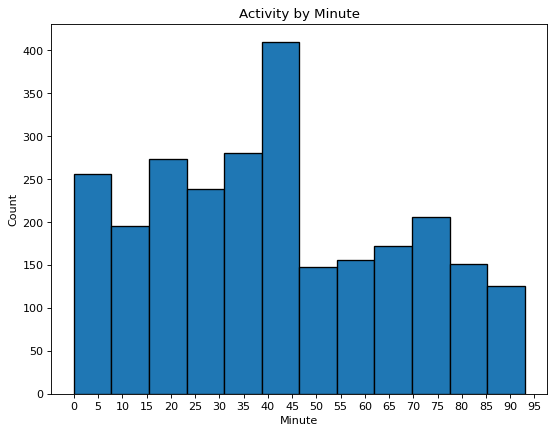

The last 10 minutes of the first half had the most activity
All other time periods where relatively the same except for the first 10 minutes of the second half which had the least activity

count    2614.000000
mean       41.444529
std        25.125764
min         0.000000
25%        21.000000
50%        40.000000
75%        62.000000
max        93.000000
Name: minute, dtype: float64


In [1561]:
#________________________________________Minute_______________________________________________________

# styling of minute diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.minute,edgecolor='black', linewidth=1.2, bins=12)

# set the ticks and labels to display as the x axis
tickvalues = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
ticklabels = ["0","5","10","15","20","25","30","35","40","45","50","55","60","65","70","75","80","85","90","95"]

plt.xticks(tickvalues,ticklabels)
plt.title("Activity by Minute")
plt.ylabel("Count")
plt.xlabel("Minute")
plt.show()

print("The last 10 minutes of the first half had the most activity")
print("All other time periods where relatively the same except for the first 10 minutes of the second half which had the least activity\n")

# describe the data showing min, max, mean, std, count, 25%, 50%, 75%
print(data.describe().minute)


#### Second

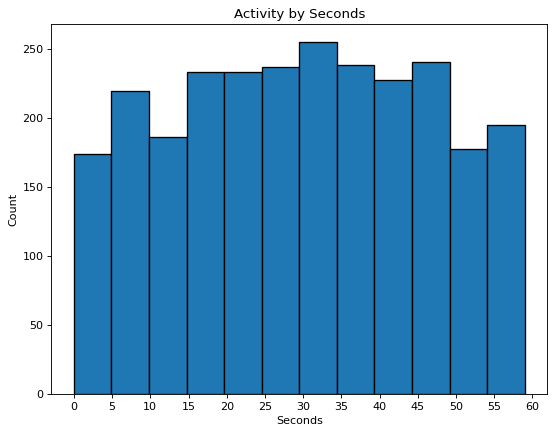

The majorit of activity happen equal throught the minute  with the exception 
10 to 15 being the lowest And 20 to 25 being the highest

count    2614.000000
mean       29.761285
std        16.622057
min         0.000000
25%        16.000000
50%        30.000000
75%        44.000000
max        59.000000
Name: second, dtype: float64


In [1562]:
#________________________________________Second _______________________________________________________

# styling of second diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.second,edgecolor='black', linewidth=1.2, bins=12)

# set the ticks and labels to display as the x axis
tickvalues = [0,5,10,15,20,25,30,35,40,45,50,55,60]
ticklabels = ["0","5","10","15","20","25","30","35","40","45","50","55","60"]

plt.xticks(tickvalues,ticklabels)
plt.title("Activity by Seconds")
plt.ylabel("Count")
plt.xlabel("Seconds")
plt.show()

print("The majorit of activity happen equal throught the minute  with the exception \n10 to 15 being the lowest And 20 to 25 being the highest\n")

# describe the data 
print(data.describe().second)

#### Pass Length

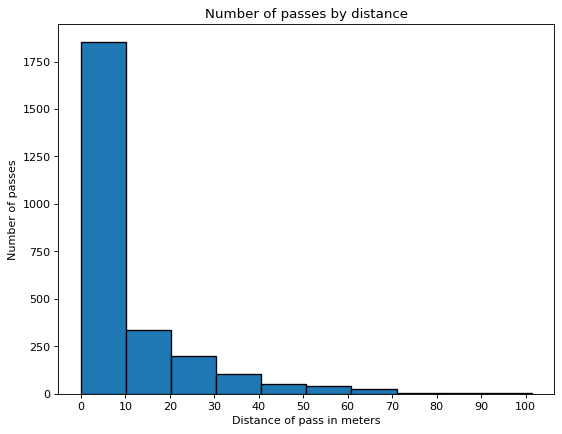

Most passes are made in the 0 - 20 meters

count    2614.000000
mean        8.192196
std        14.621349
min         0.000000
25%         0.000000
50%         0.000000
75%        12.800000
max       101.400000
Name: pass_length, dtype: float64


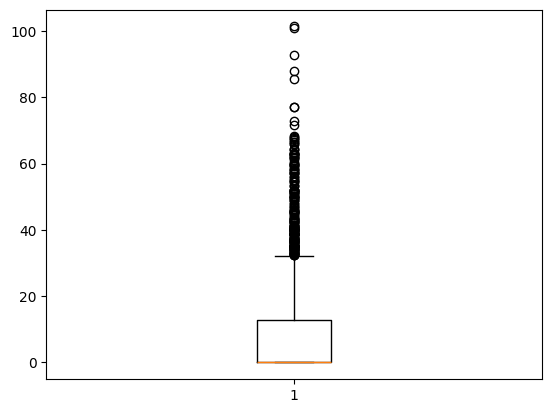

The majority of passes are made 0 to 60 meters



In [1563]:
#________________________________________Pass Length _______________________________________________________

# styling of pass length diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.pass_length,edgecolor='black', linewidth=1.2)

# set the ticks and labels to display as the x axis
tickvalues = [0,10,20,30,40,50,60,70,80,90,100]
ticklabels = ["0","10","20","30","40","50","60","70","80","90","100"]

plt.xticks(tickvalues,ticklabels)
plt.title("Number of passes by distance")
plt.ylabel("Number of passes")
plt.xlabel("Distance of pass in meters")
plt.show()
print("Most passes are made in the 0 - 20 meters\n")

# describe the data of pass length
print(data.describe().pass_length)

# Boxplot for pass length
plt.boxplot(x=data.pass_length)
plt.show()
print("The majority of passes are made 0 to 60 meters\n")


#### Period

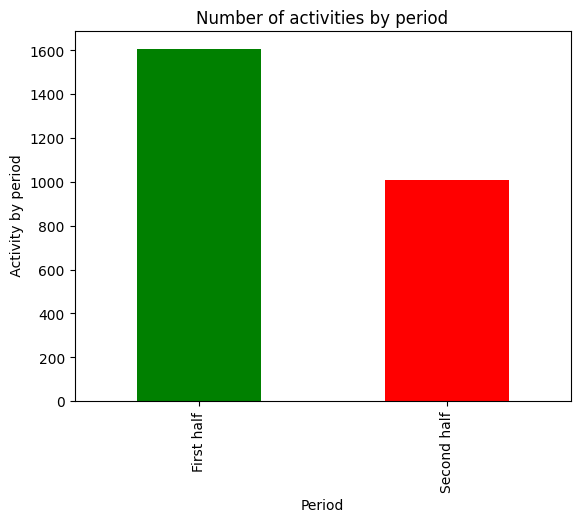

The number of activities in both periods is almost identical

count    2614.000000
mean        1.385998
std         0.486923
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: period, dtype: float64


In [1564]:
#________________________________________Period_______________________________________________________
period_count = data['period'].value_counts()
period_count.plot.bar(color =['green','red'])
plt.title("Number of activities by period")

tickvalues = [0,1]
ticklabels = ["First half","Second half"]
plt.xticks(tickvalues,ticklabels)

plt.xlabel("Period")
plt.ylabel(" Activity by period")
plt.show() #Show the plot
print("The number of activities in both periods is almost identical\n") 


# describe the data showing min, max, mean, std, count, 25%, 50%, 75%
print(data.describe().period)

## Bivariate Analysis
Examine relationship between pairs of variables

### Numerical - Numerical

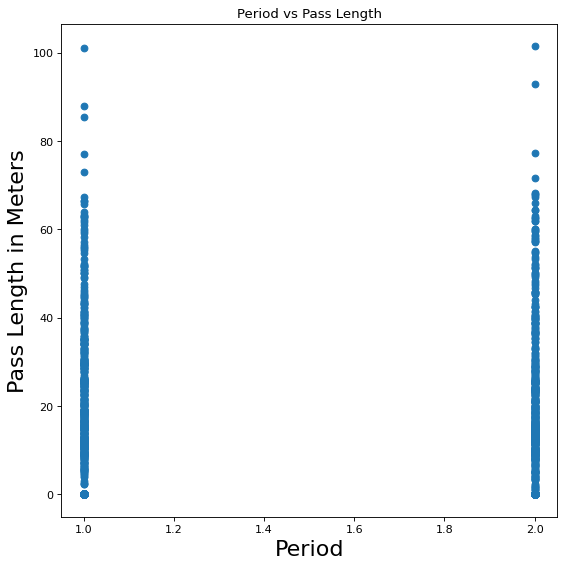

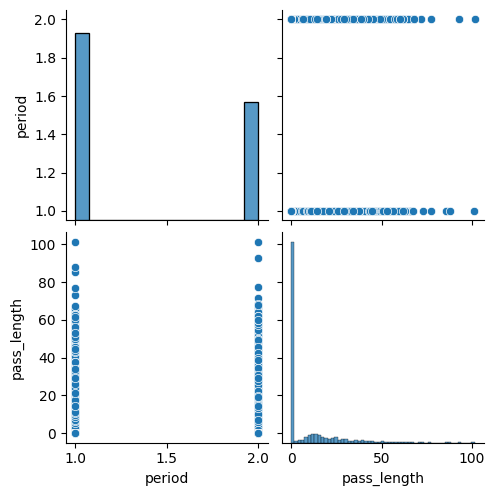

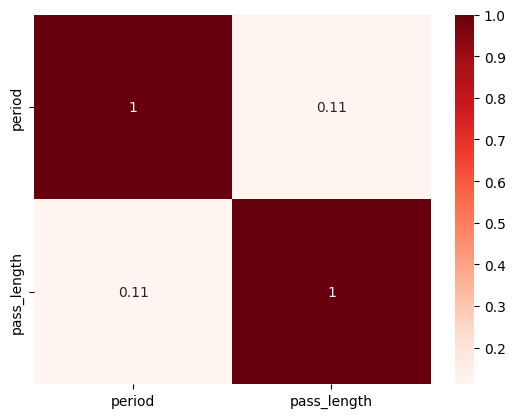

             pass_length   period
pass_length      1.00000  0.11242
period           0.11242  1.00000
There seems to be a very weak positive correlation between the period of play and the pass length


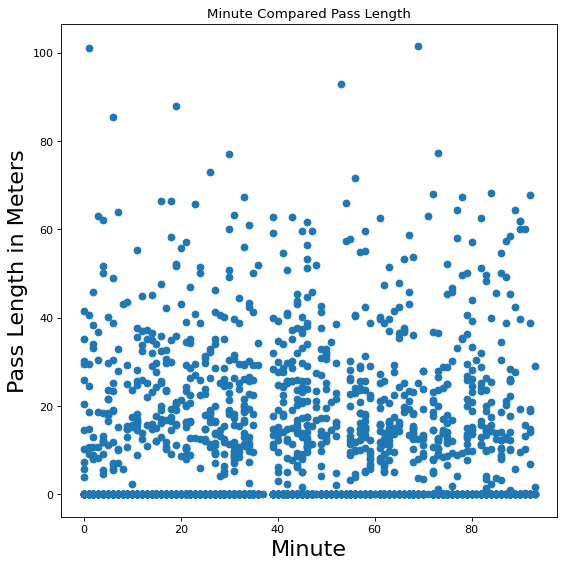

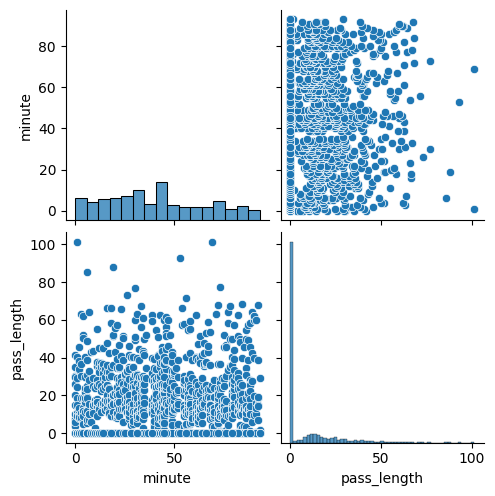

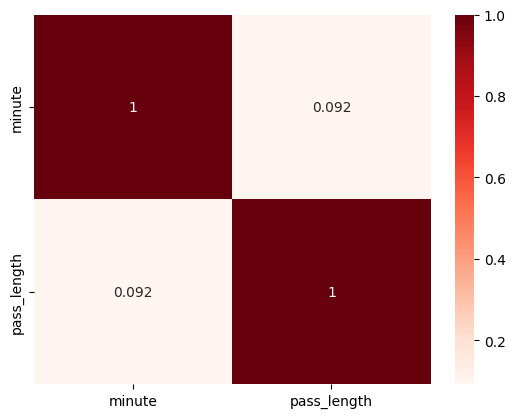

             pass_length  minute
pass_length       1.0000  0.0918
minute            0.0918  1.0000
There seems to be a very weak positive correlation between the minute of play and the pass length


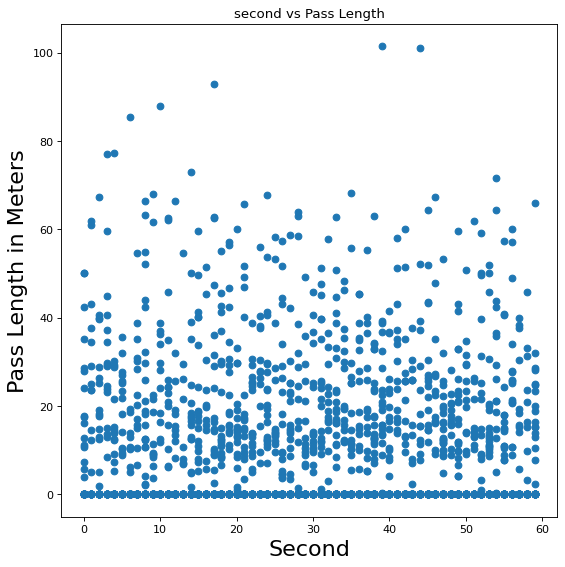

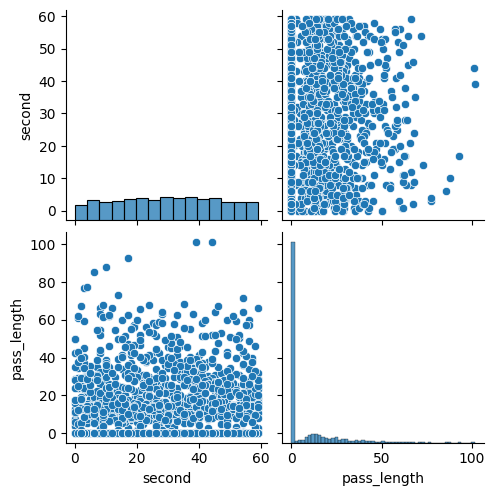

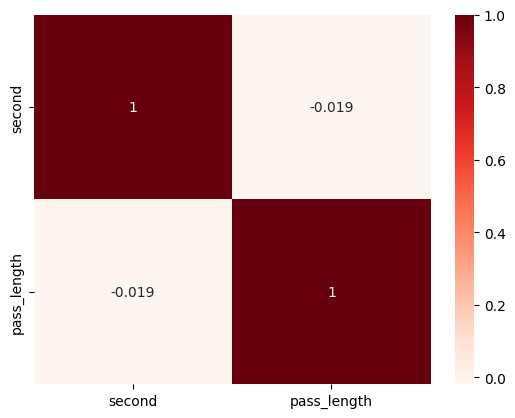

             pass_length   second
pass_length      1.00000 -0.01931
second          -0.01931  1.00000
There seems to be a very weak negative correlation between the period of play and seconds


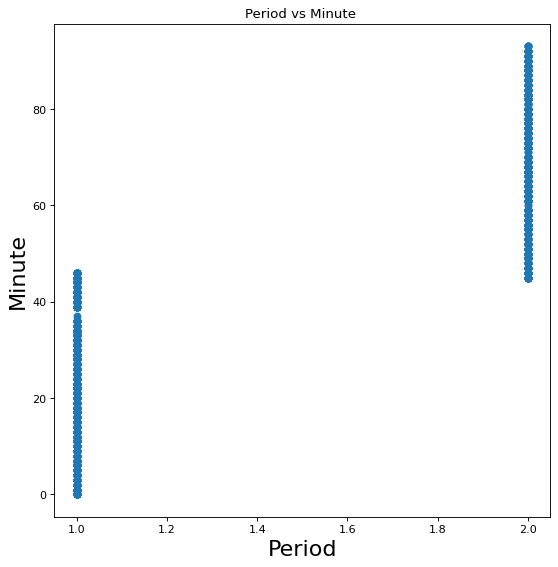

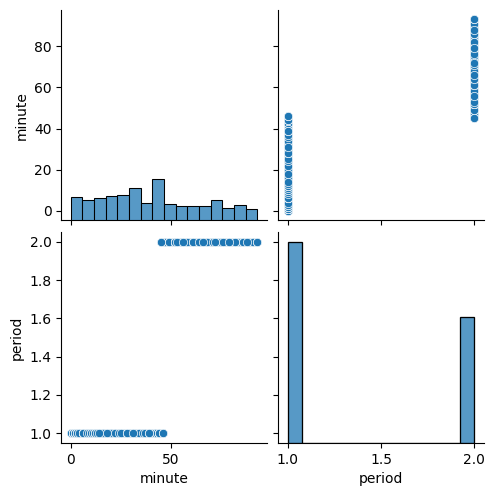

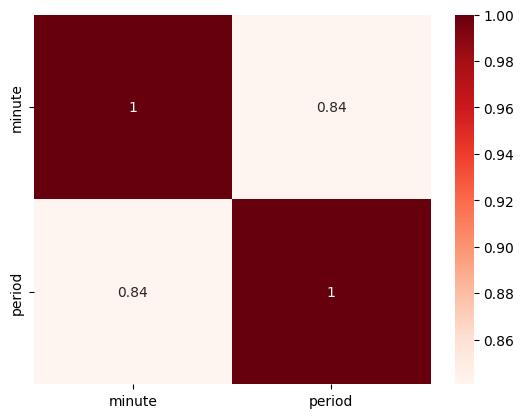

          minute    period
minute  1.000000  0.840723
period  0.840723  1.000000
There seems to be a strong positive correlation between the period of play and the minute


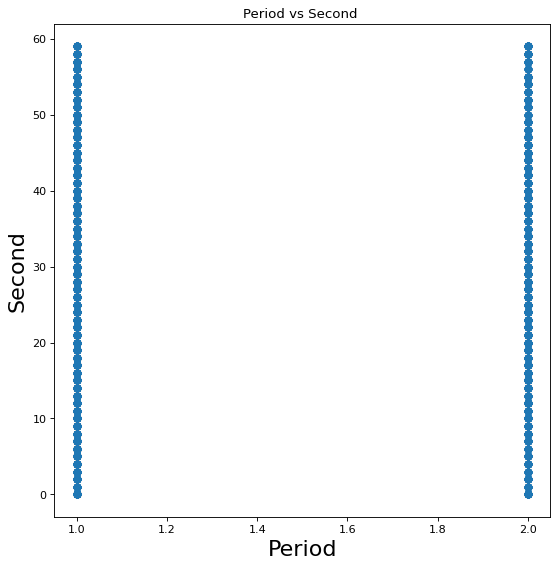

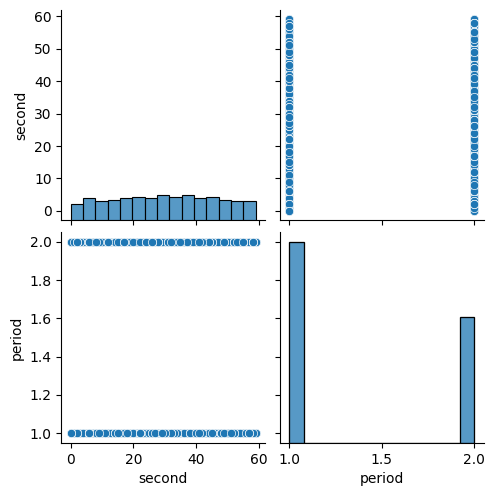

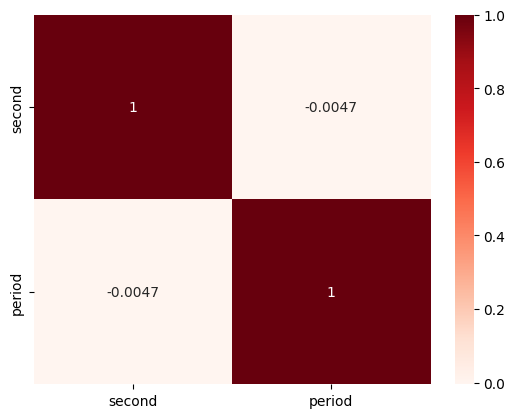

          second    period
second  1.000000 -0.004735
period -0.004735  1.000000
There seems to be almost no correlation between the seconds of play and  period played in


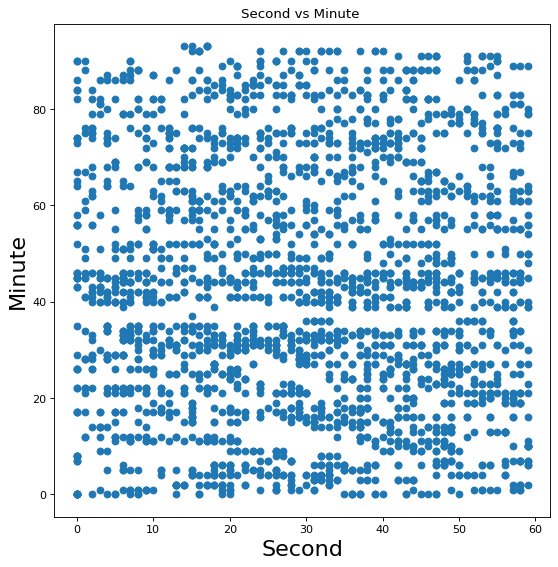

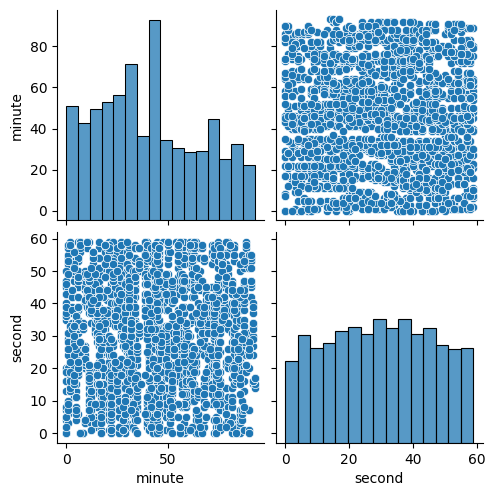

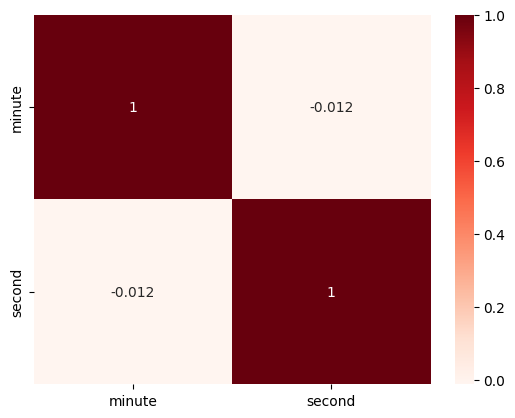

          minute    second
minute  1.000000 -0.011631
second -0.011631  1.000000
There seems to be only a very weak negative correlation between the minute of play and second of play 


In [1565]:
#________________________________________Pass Length / Period _______________________________________________________
# numeric analysis for two variables where both are numeric

#plot the scatter plot of Period and Pass Length variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.period,data.pass_length)
plt.title("Period vs Pass Length")
plt.xlabel("Period", size=20)
plt.ylabel("Pass Length in Meters", size=20)
plt.show()

# Creating a matrix using period and pass_length as rows and columns
sns.pairplot(data = data, vars=['period','pass_length'])
plt.show()


#plot the correlation matrix of period and pass_length in data dataframe.
sns.heatmap(data[['period','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['pass_length','period']].corr())
print("There seems to be a very weak positive correlation between the period of play and the pass length")
#________________________________________Pass Length / minute _______________________________________________________

#plot the scatter plot of pass length and minute variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.minute,data.pass_length)
plt.title("Minute Compared Pass Length")
plt.xlabel("Minute", size=20)
plt.ylabel("Pass Length in Meters", size=20)
plt.show()

# Creating a matrix using period and minute as rows and columns
sns.pairplot(data = data, vars=['minute','pass_length'])
plt.show()


#plot the correlation matrix of minute and pass length in data dataframe.
sns.heatmap(data[['minute','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['pass_length','minute']].corr())
print("There seems to be a very weak positive correlation between the minute of play and the pass length")

#________________________________________Pass Length / second _______________________________________________________

#plot the scatter plot of Second and pass length variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.second,data.pass_length)
plt.title("second vs Pass Length")
plt.xlabel("Second", size=20)
plt.ylabel("Pass Length in Meters", size=20)
plt.show()

# Creating a matrix using second, pass_length as rows and columns
sns.pairplot(data = data, vars=['second','pass_length'])
plt.show()

#plot the correlation matrix of second and pass length in data dataframe.
sns.heatmap(data[['second','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['pass_length','second']].corr())
print("There seems to be a very weak negative correlation between the period of play and seconds")
#________________________________________Period / minute _______________________________________________________

#plot the scatter plot of period and minute variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.period,data.minute)
plt.title("Period vs Minute ")
plt.xlabel("Period", size=20)
plt.ylabel("Minute", size=20)
plt.show()

# Creating a matrix using period and minute as rows and columns
sns.pairplot(data = data, vars=['minute','period'])
plt.show()


#plot the correlation matrix of minute and balance in data dataframe.
sns.heatmap(data[['minute','period']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['minute','period']].corr())
print("There seems to be a strong positive correlation between the period of play and the minute")
#________________________________________Period / second _______________________________________________________

#plot the scatter plot of period and second variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.period,data.second)
plt.title("Period vs Second ")
plt.xlabel("Period", size=20)
plt.ylabel("Second", size=20)
plt.show()

#Summary Statement - There is no indication that those who are older will have higher balances 

# Creating a matrix using second and period as rows and columns
sns.pairplot(data = data, vars=['second','period'])
plt.show()


#plot the correlation matrix of second and period in data dataframe.
sns.heatmap(data[['second','period']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['second','period']].corr())
print("There seems to be almost no correlation between the seconds of play and  period played in")


#________________________________________Minute / second _______________________________________________________

#plot the scatter plot of minute and second variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.second,data.minute)
plt.title("Second vs Minute ")
plt.xlabel("Second", size=20)
plt.ylabel("Minute", size=20)
plt.show()

# Creating a matrix using minute and second as rows and columns
sns.pairplot(data = data, vars=['minute','second'])
plt.show()


#plot the correlation matrix of minute and second in data dataframe.
sns.heatmap(data[['minute','second']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['minute','second']].corr())
print("There seems to be only a very weak negative correlation between the minute of play and second of play ")


### Numerical - Categorical

Mean period by shot_outcome:
shot_technique
Half Volley    43.000000
Normal         46.076923
Volley         34.000000
Name: minute, dtype: float64
Median Salary by Response:
shot_technique
Half Volley    41.5
Normal         52.0
Volley         34.0
Name: minute, dtype: float64


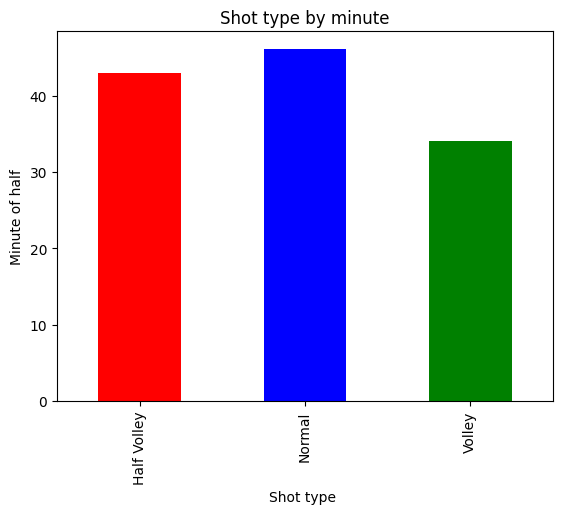

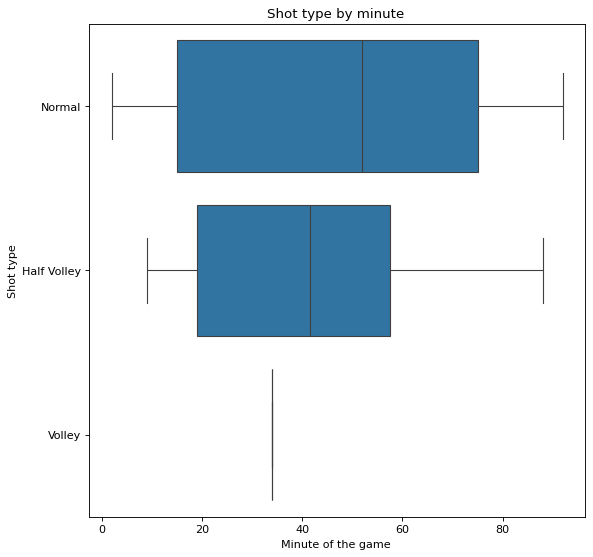

Normal shots mostly get taken in the start of the second half   NOT FINISHED


In [1566]:
#________________________________________shots by period_______________________________________________________
# difficulty getting numerical and categorical to work as it goes out of bounds

#We analyze them mainly using mean, median, and box plots.
#Investigate salary and response columns from our dataset.

filtered_Shot_technique = data[data['shot_technique'] != 'N/A']

#groupby the response to find the mean and median of the salary with response no & yes separately.
print("Mean period by shot_outcome:")
meanSalaryResponse=filtered_Shot_technique.groupby('shot_technique')['minute'].mean()
print(meanSalaryResponse)

print("Median Salary by Response:")
print(filtered_Shot_technique.groupby('shot_technique')['minute'].median())

meanSalaryResponse.plot.bar(color =['red','blue','green'])
plt.title("Shot type by minute")
plt.xlabel("Shot type ")
plt.ylabel("Minute of half")
plt.show()
# Not displaying how expected needs fixing 



# volly not working
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_Shot_technique['minute'], y=filtered_Shot_technique['shot_technique'])
plt.title("Shot type by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Shot type")
plt.show()
print("Normal shots mostly get taken in the start of the second half   NOT FINISHED")



#________________________________________pass distance by success rate_______________________________________________________

### Categorical - Categorical

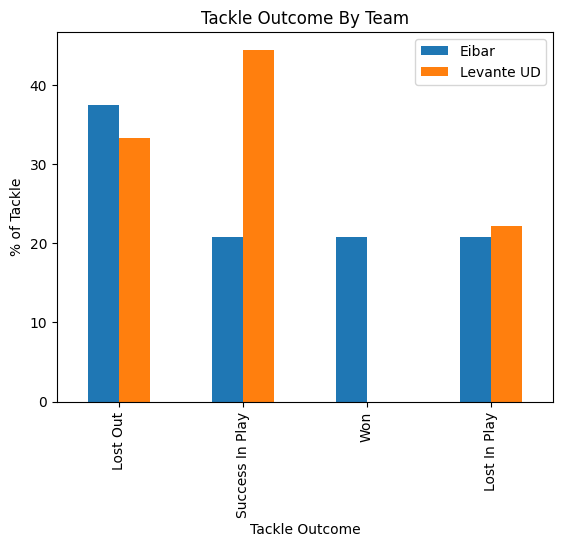

Levante have a marginally better tackling success rate than Eibar


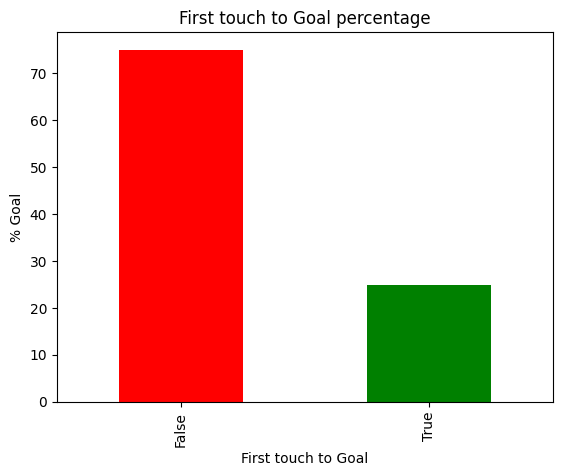

First touch goals make up 25% of all goals scored in the game


In [1567]:
#________________________________________Tackle outcome by team_______________________________________________________

# Filter data by team and N/A from duel outcome above
eibar_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Eibar']
levante_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Levante UD'] 

# Calculate the percentage of each tackle outcome probability by team.
eibar_data_percentages = eibar_data['duel_outcome'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['duel_outcome'].value_counts(normalize=True)*100

# Plot the bar chart for the tackle outcome by team .
# It was a challenge to be able to joint the two teams together and compare them tried with hue at first. settled with using concat
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Tackle Outcome By Team")
plt.xlabel("Tackle Outcome")
plt.ylabel("% of Tackle")
plt.show() #Show the plot
print("Levante have a marginally better tackling success rate than Eibar") 


#________________________________________First touch / goal_______________________________________________________


# Filter data by shot outcome to only be goal
goal_outcome_data = data[data['shot_outcome'] == 'Goal'] 

# Calculate the percentage of shots taken first time that where goals 
shot_firstime_percentages = goal_outcome_data['shot_first_time'].value_counts(normalize=True)*100

# Plot the bar chart for the goals outcome by first touch .
shot_firstime_percentages.plot.bar(color =['red','green'])
plt.title("First touch to Goal percentage")
plt.xlabel("First touch to Goal")
plt.ylabel("% Goal")

plt.show() #Show the plot
print("First touch goals make up 25% of all goals scored in the game") 


#________________________________________Header by goal and on target_______________________________________________________



#_______________________________________Total amount of passes leading to shots_______________________________________________________




## Multivariate Analysis

               minute    second  pass_length
minute       1.000000 -0.011631      0.09180
second      -0.011631  1.000000     -0.01931
pass_length  0.091800 -0.019310      1.00000


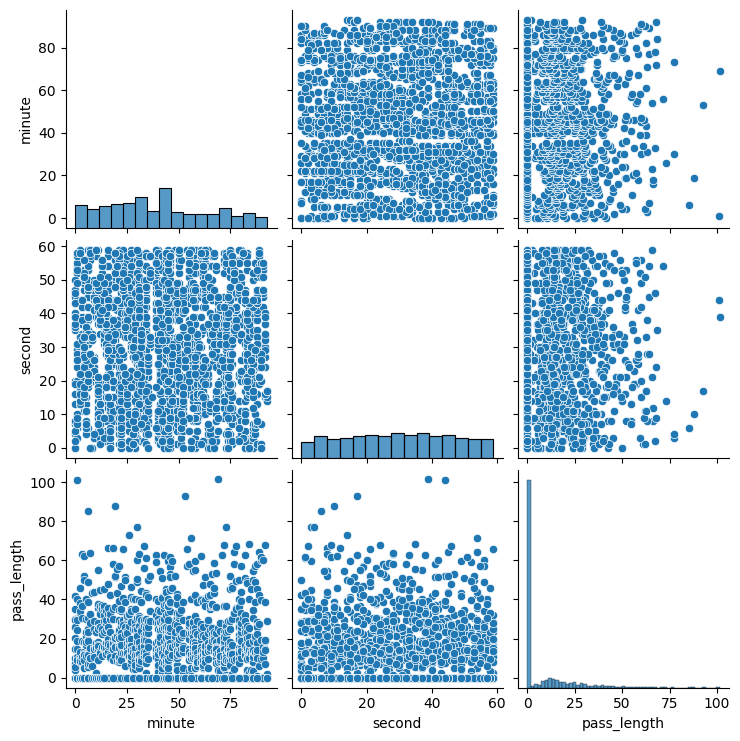

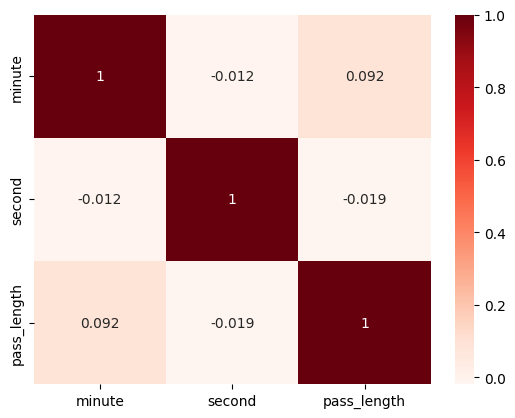

               minute    period  pass_length
minute       1.000000  0.840723      0.09180
period       0.840723  1.000000      0.11242
pass_length  0.091800  0.112420      1.00000


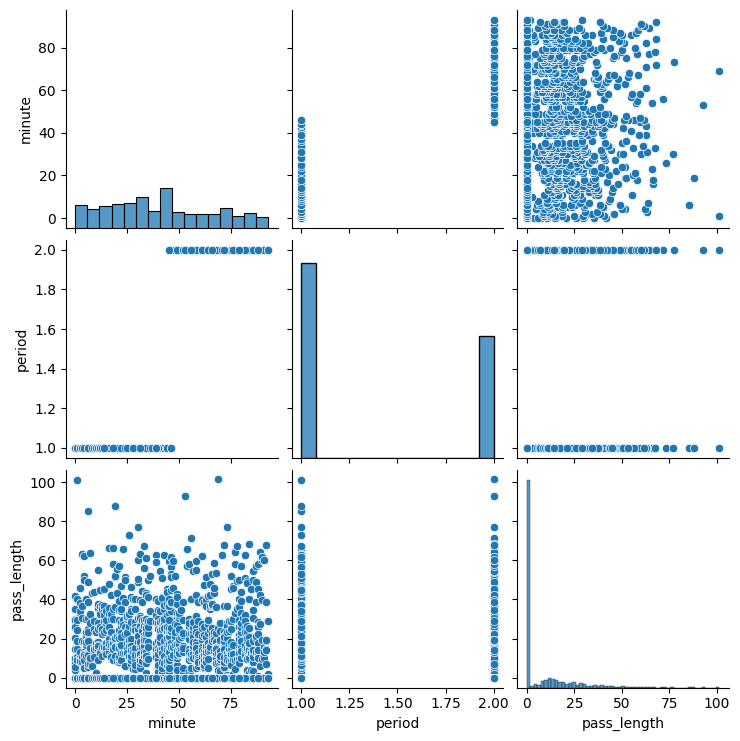

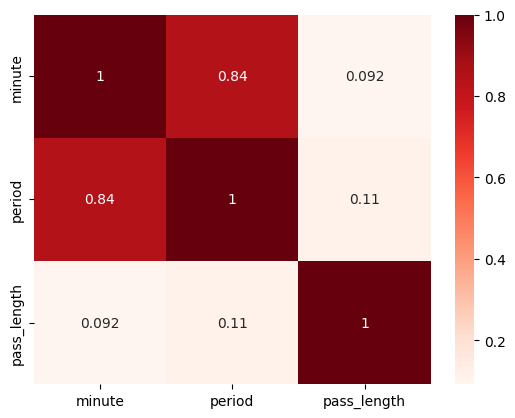

               period    second  pass_length
period       1.000000 -0.004735      0.11242
second      -0.004735  1.000000     -0.01931
pass_length  0.112420 -0.019310      1.00000


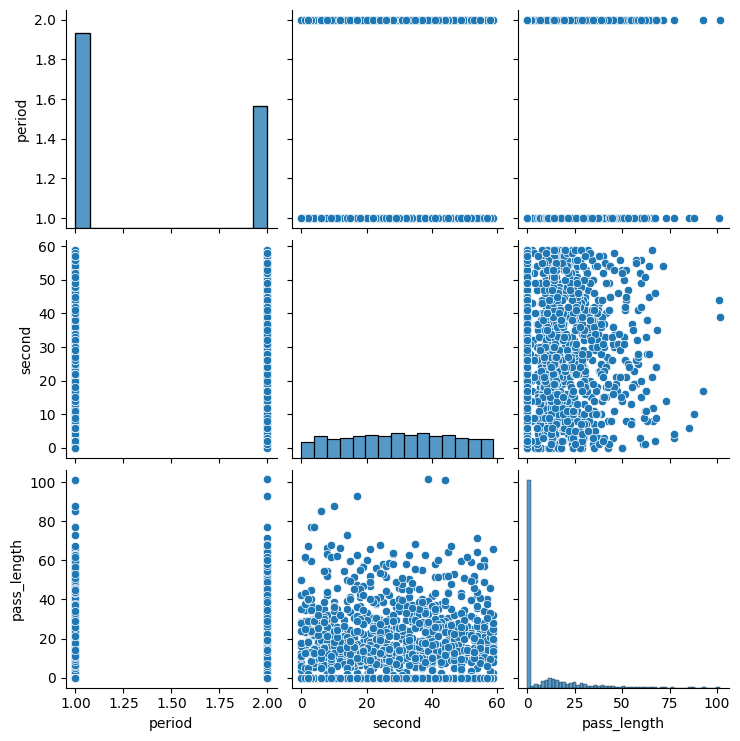

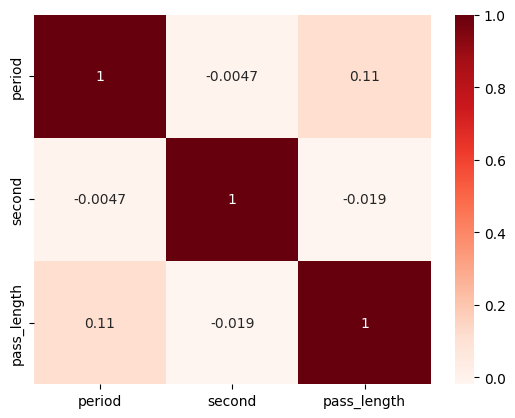

          period    second    minute
period  1.000000 -0.004735  0.840723
second -0.004735  1.000000 -0.011631
minute  0.840723 -0.011631  1.000000


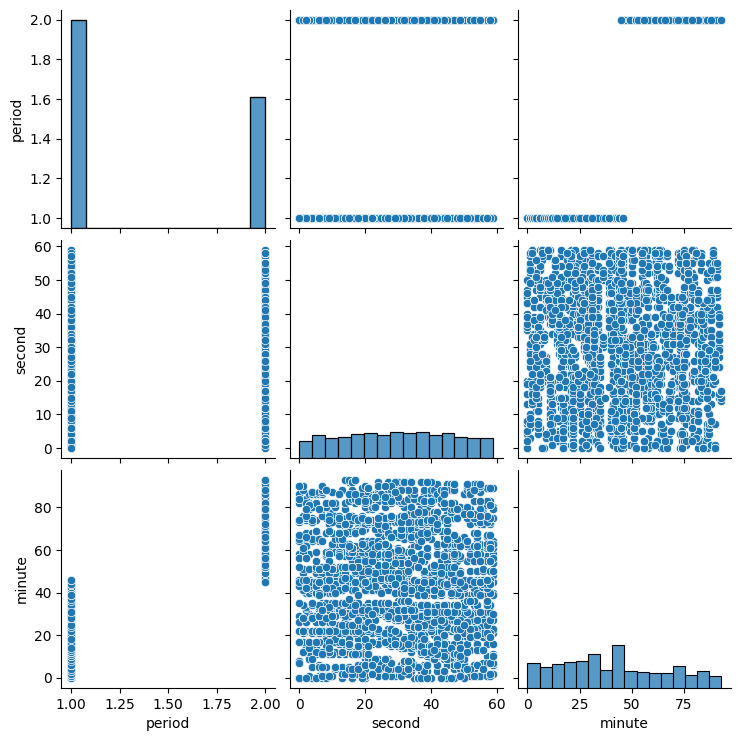

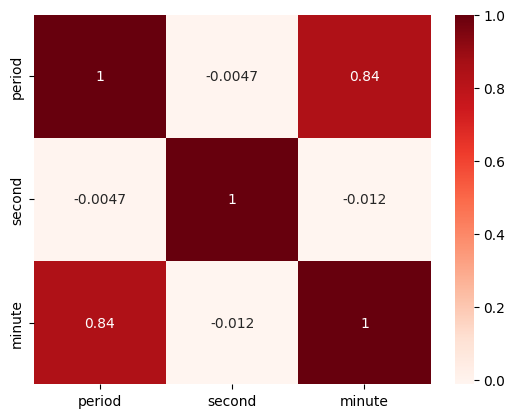

In [1568]:
#________________________________________Regular shot / target /period +- 5 before the end of the half_______________________________________________________
#9.Analyzing the probability of a player trying to take a regular shot on goal near the end of the first and second halves(+/- 5 minutes before the half ends


#10. 5.Investigating which team is more likely to fail a tackle in the first half compared to the second half



#If we analyze data by taking there or more variables/columns into consideration from a dataset, it is known as Multivariate Analysis.
#Let’s investigate how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.
#First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

#Pivot table automatically uses the mean value of the response_rate argument.
####result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
####print(result)

#create heat map of education vs marital vs response_rate
###figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
###sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
###plt.show()

#Based on the Heatmap we can infer that the married people with primary education are less likely to respond positively for the survey and single people with tertiary education are most likely to respond positively to the survey.
#Similarly, we can plot the graphs for Job vs marital vs response, Education vs poutcome vs response, etc.



#________________________________________Minute / second / pass length _______________________________________________________

# Creating a matrix using period, minute, pass_length as rows and columns
print(data[['minute','second','pass_length']].corr())

sns.pairplot(data = data, vars=['minute','second','pass_length'])
plt.show()
 

#plot the correlation matrix of period, minute and pass_length in data dataframe.
sns.heatmap(data[['minute','second','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#________________________________________Minute / period / pass length _______________________________________________________

# Creating a matrix using period, minute, pass_length as rows and columns
print(data[['minute','period','pass_length']].corr())

sns.pairplot(data = data, vars=['minute','period','pass_length'])
plt.show()
 

#plot the correlation matrix of minute, pass_length and period in data dataframe.
sns.heatmap(data[['minute','period','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#________________________________________second / period / pass length _______________________________________________________

# Creating a matrix using period, second, pass_length as rows and columns
print(data[['period','second','pass_length']].corr())

sns.pairplot(data = data, vars=['period','second','pass_length'])
plt.show()
 

#plot the correlation matrix of second, period and pass length in data dataframe.
sns.heatmap(data[['period','second','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()


#________________________________________second / minute / period _______________________________________________________

# Creating a matrix using period, minute, second as rows and columns
print(data[['period','second','minute']].corr())

sns.pairplot(data = data, vars=['period','second','minute'])
plt.show()
 

#plot the correlation matrix of period, minute and second in data dataframe.
sns.heatmap(data[['period','second','minute']].corr(), annot=True, cmap = 'Reds')
plt.show()





# 5 - Feature Engineering:

# 6 – Predictive Modelling:

# 7 – Findings:

# 8- References

In [1569]:
#Github Repo
#https://github.com/NojusMat/DataScience_CA2.git

#Converting column to float
#https://sparkbyexamples.com/pandas/pandas-convert-string-to-float-type-dataframe/#:~:text=Alternatively%2C%20you%20can%20convert%20all,'Discount'%20column%20to%20float.

#Panda Filters
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html

# Combining two charts together
#https://stackoverflow.com/questions/50912819/how-to-combine-two-bar-chart-of-two-files-in-one-diagram-in-matplotlib-pandas

#Concatenation
#https://www.dataquest.io/blog/pandas-concatenation-tutorial/